Write a colab to demonstrate various dimensionality reduction techniques discussed in the class using 

a) any image data set

You need to showcase 

i) PCA

ii) SVD

iii) LLE

iv) t-SNE

v) ISOMAP

vi) UMAP



 

In [ ]:
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)


In [ ]:
digits['images'][1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [ ]:
digits['target'][0]

0

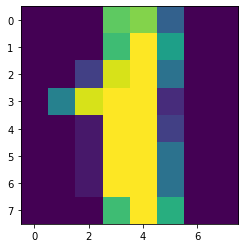

In [ ]:
var1 = digits['images'][1]
plt.imshow(var1, interpolation='none')
plt.show()

In [ ]:
image1=[]
for i in digits['images']:
  image1.append(i.flatten())

In [ ]:
df1 = pd.DataFrame(image1)

In [ ]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
sc = StandardScaler()
df2 = sc.fit_transform(df1)

In [ ]:
df2

array([[ 0.        , -0.39943855, -0.16703526, ..., -1.14434334,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855, -1.14805039, ...,  0.62132675,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855, -1.14805039, ...,  1.68072881,
         1.54537005, -0.24520445],
       ...,
       [ 0.        , -0.39943855, -1.14805039, ...,  0.44475974,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855, -1.14805039, ..., -0.4380753 ,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855,  0.02916776, ..., -0.08494129,
        -0.48218707, -0.24520445]])

In [ ]:
cm = np.cov(df2.T)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(cm)


In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigen values in descending order:')
for i in eigen_pairs:
    print(i[0])


Eigen values in descending order:
9.38602294430675
6.259089545946321
4.890136767833188
4.2801978155219444
2.9575420372563364
2.7243878147764535
2.2447381552755528
2.038091962228194
1.8055848104703442
1.7019314896894628
1.5311497473965183
1.3925827354462128
1.3549583563736545
1.1656551958564692
1.1316984807768649
1.0712907289092586
0.9910113310411468
0.9285440251415379
0.8678992594921748
0.8234394181663722
0.7571794555272785
0.7275389521598351
0.6724142439257469
0.6414383189700323
0.5928164412526205
0.5731322782092005
0.5170278726648576
0.4897857895797305
0.46563299053209983
0.44530599558894884
0.40630280000680635
0.3810682714313109
0.35091489932496855
0.3425727729174108
0.3060329160868314
0.289854316843051
0.2823671962130587
0.2560408297908024
0.24502276139991605
0.22479113951803203
0.044621229628077096
0.05041638363435904
0.06018570507145931
0.19625642400910093
0.19301193370441966
0.18382661319306334
0.17936046041611733
0.0725465408173109
0.07746893379933778
0.08179380934503483
0.0885

In [ ]:
pca = PCA()


In [ ]:
pca = pca.fit(df2)

In [ ]:
explained_ariance = pca.explained_variance_ratio_

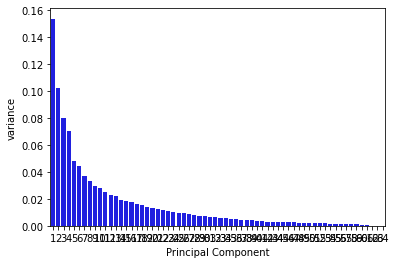

In [ ]:
df = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':[i+1 for i in range(64)]})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

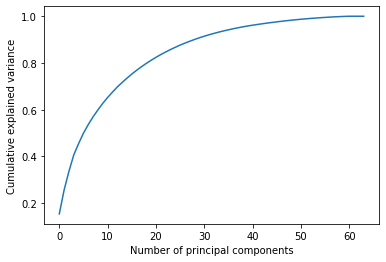

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(df2)
pca_2d = pca_2.transform(df1)

In [ ]:
pca_2d

array([[ 10.21408045,  22.49383899],
       [ -2.21147205, -26.298936  ],
       [  1.20456735, -14.16445391],
       ...,
       [ 28.10073397,  -8.24945939],
       [ 28.50237278, -12.53733486],
       [ 13.6667127 ,  18.85184281]])

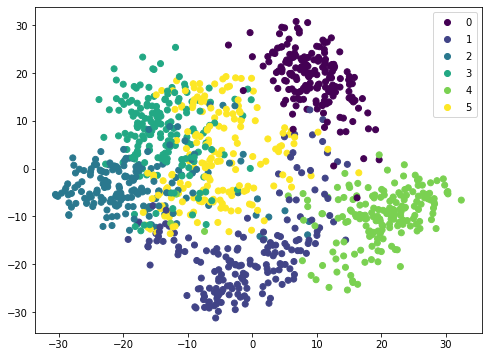

In [ ]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(pca_2d[:,0], pca_2d[:,1],c=digits['target'],label=digits['target_names'])
plt.legend(*scatter.legend_elements())

#SVD

In [ ]:

u, s, v = np.linalg.svd(df1, full_matrices=True)

In [ ]:

u.shape


(1083, 1083)

In [ ]:

s.shape

(64,)

In [ ]:

v.shape

(64, 64)

Text(0, 0.5, 'Percent of the variance explained')

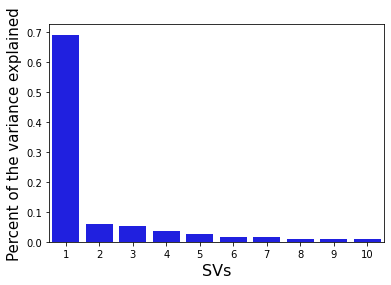

In [ ]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained[:10])+1)),
            y=variance_explained[:10], color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [ ]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=digits["target"].tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,0.027055,0.021058
1,1,0.032900,-0.000641
2,2,0.032591,0.003787
3,3,0.026865,-0.033089
4,4,0.024066,0.047796


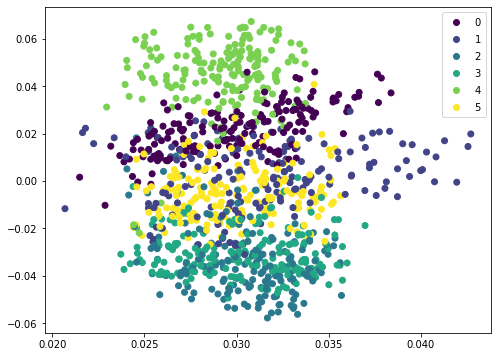

In [ ]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(svd_df['SV1'],svd_df['SV2'],c=svd_df['Class'],label=digits['target_names'])
plt.legend(*scatter.legend_elements())

#Applying LLE, TSNE, ISOMAP 

In [ ]:
import matplotlib.pyplot as plt

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30



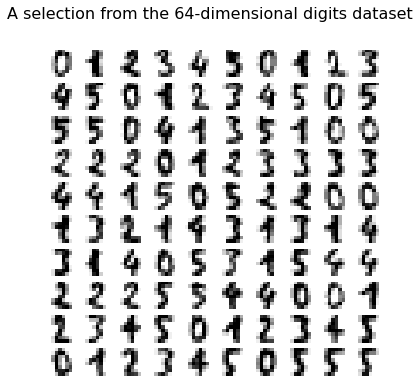

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [ ]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)

    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        ax.text(
            X[i, 0],
            X[i, 1],
            str(y[i]),
            color=plt.cm.Dark2(y[i]),
            fontdict={"weight": "bold", "size": 9},
        )

        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=100),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2, init="pca", learning_rate="auto", random_state=0
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="random", random_state=0
    ),
}

Store the projected data and computational time to perform each projection.

In [ ]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    #projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...
Computing NCA embedding...


plot the resulting projection given by each method. LLE does better.

KeyError: ignored

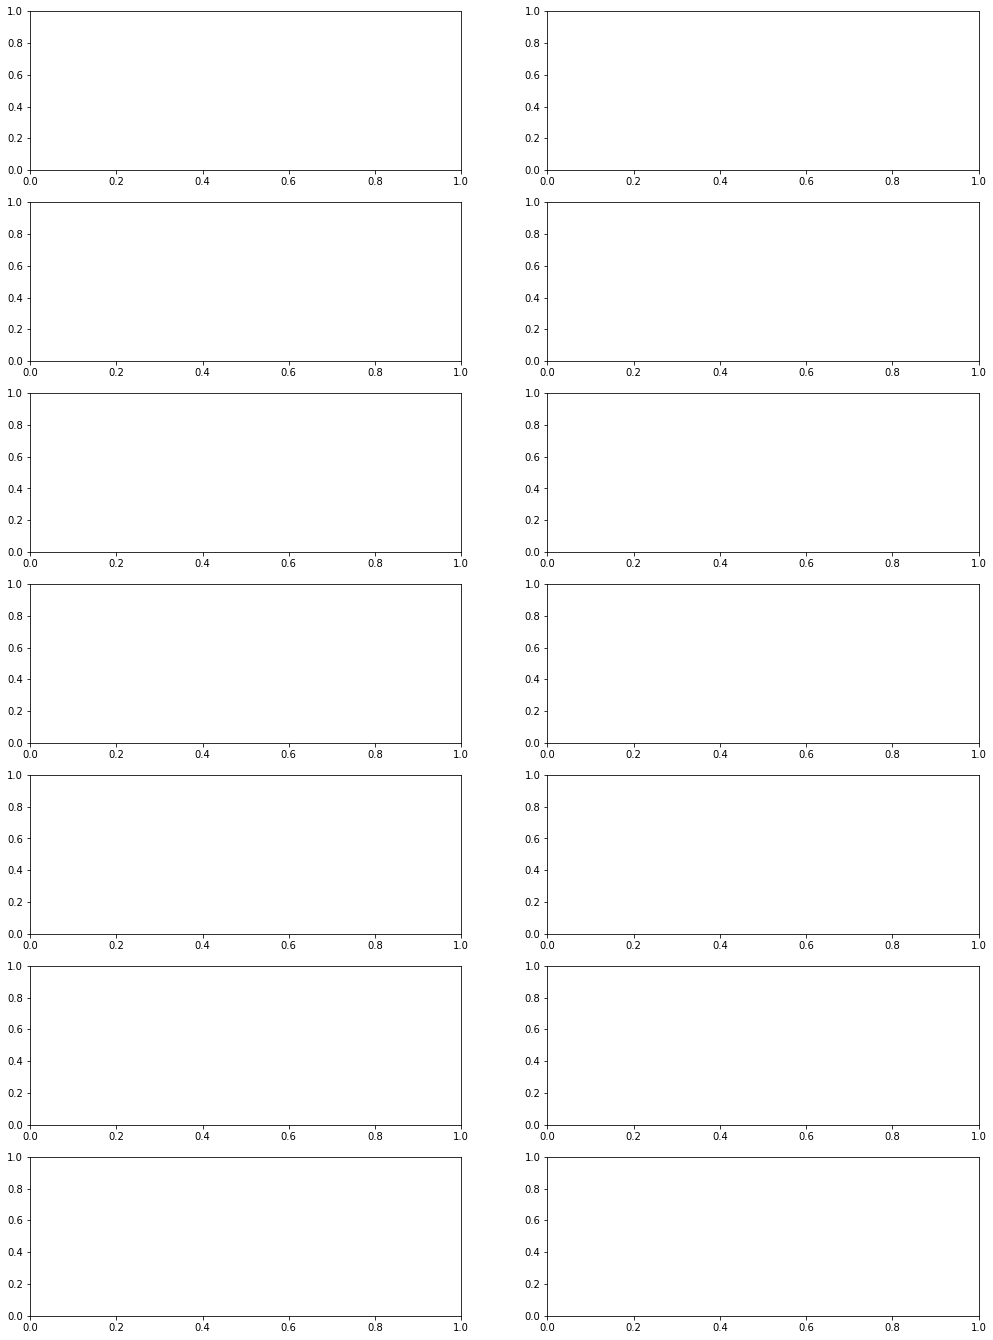

In [ ]:
from itertools import zip_longest

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip_longest(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title, ax)

plt.show()

#UMAP

In [ ]:
!pip install umap-learn


     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 19.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=bb32af7c9dcbedf31bced3f0dd9716c25adf513c8967fbf32df997176dcef317
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=8b272092cf91acbeca16e2a553b8b021ae76ba25684b36a89ce6264f085cd86a
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap
import time
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(df1)
print('Duration: {} seconds'.format(time.time() - start))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Duration: 12.021777629852295 seconds


In [ ]:
mapper = umap.UMAP().fit(digits.data)

In [ ]:
!pip install "umap-learn[plot]"
import colorcet
import holoviews as hv
import sklearn.decomposition
import umap.plot


     |████████████████████████████████| 15.8 MB 594 bytes/s 
     |████████████████████████████████| 76 kB 4.1 MB/s 
     |████████████████████████████████| 132 kB 54.5 MB/s 
     |████████████████████████████████| 793 kB 22.3 MB/s 
     |████████████████████████████████| 793 kB 62.7 MB/s 
     |████████████████████████████████| 791 kB 49.3 MB/s 
     |████████████████████████████████| 786 kB 50.1 MB/s 
     |████████████████████████████████| 779 kB 67.0 MB/s 
     |████████████████████████████████| 778 kB 58.9 MB/s 
     |████████████████████████████████| 776 kB 49.3 MB/s 
     |████████████████████████████████| 769 kB 58.8 MB/s 
     |████████████████████████████████| 766 kB 54.6 MB/s 
     |████████████████████████████████| 1.0 MB 63.5 MB/s 
     |████████████████████████████████| 722 kB 48.5 MB/s 
     |████████████████████████████████| 722 kB 60.4 MB/s 
     |████████████████████████████████| 715 kB 61.1 MB/s 
     |████████████████████████████████| 705 kB 66.2 MB/s 
     |███████

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


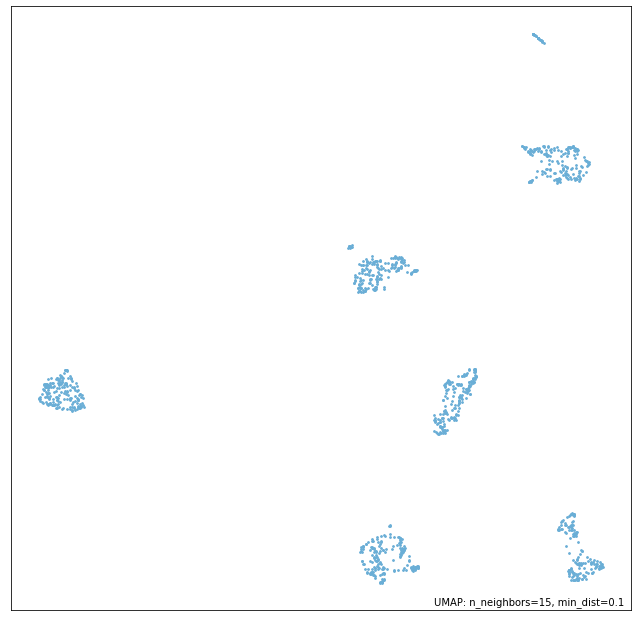

In [ ]:
umap.plot.points(mapper)


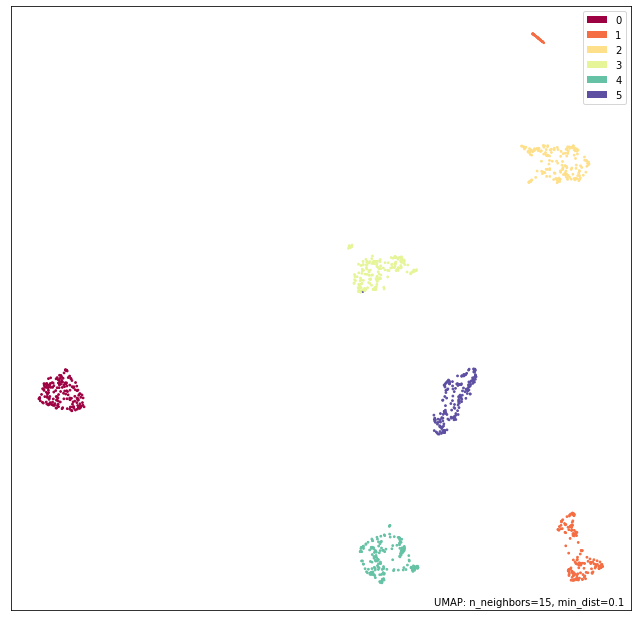

In [ ]:
umap.plot.points(mapper, labels=digits.target)